#EM(期望最大)算法与高斯混合模型(GMM)

#1 概述

##1.1 概述
EM算法本质上来说是一种寻找问题最优解的优化算法，高斯混合模型是EM算法的一个典型的应用场景。
常见的寻找问题最优解的方法：
- EM算法
- 梯度下降法 - 线性回归
- 坐标上升法 - 支持向量机
- 极大似然估计 - 逻辑回归

EM算法是一个无监督算法，一种聚类的算法。这个算法思想简单，但是推导复杂。它的本质就是极大似然估计法求解未知参数的最优解。极大似然估计是求解参数的最优解，EM算法对其进行了推广，能够叫它处理更复杂的问题，这些问题中多了一些隐变量。

##1.2 应用场景
- 高斯混合模型
- K-Means聚类
- HMM-隐马尔可夫模型

比如观察人的身高，符合正态分布，那么参数就有两个$(\mu,\sigma^2)$,我们现在有100个男性的身高和100个女性的身高,那么求解均值和标准差的过程就是估计高斯分布的参数,可以直接根据公式$\hat{\mu}=\frac{1}{n}\sum_{i=1}^nx_i=\overline{x}$,$\hat{\sigma}^2=\frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})^2$.

上述问题中，我们是性别已知的，但是如果我们收集了200个人的身高，而性别未知，又该如何处理？这样就涉及到了两个分布、两个分布的参数.那么首先需要先性别估计，然后才能估计高斯分布.这个时候就需要用到EM算法，性别估计的参数就是隐变量

#1.3 EM算法和坐标上升法的对比
- 坐标上升法：假设我们想估计知道A和B两个参数，在开始状态下二者都是未知的，但如果知道了A的信息就可以得到B的信息，反过来知道了B也就得到了A
- EM算法：首先赋予A初始值，以此得到B的估计值，然后从B的当前值触发，重新估计A的取值，这个过程一直持续到收敛为止

EM算法本质上就是一个坐标上升法

##1.4 EM算法和K-Means算法的对比
K-Means算法是一种聚类算法，它最后得到的结果会把样本唯一的分到一类中，而EM算法最后得到的是这个样本属于任何一种分类的概率

#2 极大似然发估计分布参数
设$X~N(\mu,\sigma^2)$，$\mu,\sigma^2$是未知参数，${x_1,x_2,...,x_n}$是来自X的一组样本，求$\mu,\sigma^2$的最大似然估计.
我们知道身高问题符合高斯分布，那么可以知道概率密度函数$f(x;\mu,\sigma^2)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2\sigma^2}(x-\mu)^2}$,我们要做的就是通过极大似然估计法来推导求出$\mu$和$\sigma^2$，看看是否跟高斯分布的一样.


解：由问题可知，抽到每个人都是独立同分布的，所以联合概率密度函数是$P(x_1,x_2,...,x_n)=\Pi_{i=1}^n\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2\sigma^2}(x_i-\mu)^2}$，现在要求的就是在联合概率最大的情况下，$\mu$和$\sigma^2$是多少。

所以对$\mu$和$\sigma^2$进行求导，但是原函数不好求导，我们就需要把它转化为对数似然$lnL=-\frac{n}{2}ln(2\pi)-\frac{n}{2}ln(\sigma^2)-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2$,然后对其进行求导，然后叫其等于0，就有：
$$\begin{cases}
\frac{\partial{lnL}}{\partial{\mu}}=\frac{1}{\sigma^2}[\sum_{i=1}^nx_i-n\mu]=0 \\
\frac{\partial{lnL}}{\partial{\sigma^2}}=-\frac{n}{2\sigma^2}+\frac{1}{(2\sigma^2)^2}\sum_{i=1}^n(x_i-\mu)^2=0
\end{cases}$$

可以得到符合正态分布的估计:
$\begin{cases}
\hat{\mu}=\frac{1}{n}\sum_{i=1}^nx_i=\overline{x} \\
\hat{\sigma}^2=\frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})^2
\end{cases}$

#3. EM算法思想
对于未知性别的估计，高斯概率密度函数要求知道两个参数，就可以知道具体的性别；极大似然要求知道性别，就能知道高斯分布参数。这就陷入了死循环。所以就引入了EM算法。

EM算法分为E(Exception)步和M(Maximization)步。

###3.1 Exception
先随便假设各个正态分布参数(对于身高的例子来说，就是$\mu$,$\sigma^2$).求出多项分布参数；
比如身高的例子，现在我们只涉及到两个高斯分布，一个是男性身高，一个是女性身高，有$H_m(\mu_m,\sigma^2_m)$和$H_w(\mu_w,\sigma^2_w)$，那我们就先假定男性身高$\mu=170,\sigma^2=0.1$,女性身高$\mu=150,\sigma^2=0.2$，那么对于一个具体的人，由于知道它的样本，根据这个假定我们就可以求出这个人是男性的概率值$P(m|x_i)$，以及是女性的概率是$P(w|x_i)$，但是这两个概率的和不一定等于1，我们需要做一个归一化操作$P(m|x_i)=\frac{P(m|x_i)}{P(m|x_i)+P(w|x_i)}$,$P(w|x_i)=\frac{P(m|x_i)}{P(m|x_i)+P(w|x_i)}$

###3.2 Maximization
用E步得到的多项分布参数，重新估计正态分布的参数，使得联合密度的似然估计最大。这个时候，两个分布的概率就变了，接着继续调整E步和M步，如此反复直到收敛

#4 随机变量的函数的期望
定理：设随机变量Y是随机变量X的函数$Y=g(X)$，这里g是连续函数，那么

1. 若X是离散型随机变量，且X的概率分布为$P\{X=x_i\}=p_i, i=1,2,...,n$,则Y的期望$E(Y)=E[g(X)]=\sum_{i=1}^ng(x_i)p_i$

2. 若X是连续型随机变量，且概率密度为f(x),则Y的期望$E(Y)=E[g(x)]=\lmoustache_{-\infty}^{+\infty}g(x)f(x)dx$

$\sum_{z^(i)}Q_i(z^{(i)})log\frac{p(x^{(i)},z^{(i)}); \theta}{Q_i(z^{(i)})}$就一个随机变量函数的期望

#5 极大似然估计

## 5.1 全概率公式
我们知道全概率公式为:$P(B)=P(A_1B+A_2B+...+A_nB)=\sum\limits_{i=1}^nP(A_iB)$，由于$P(A_iB)=P(A_i)P(B|A_i)$,所以$P(B)=\sum\limits_{i=1}^nP(A_i)P(B|A_i)$

极大似然估计就是要联合密度函数最大

$\sum\limits_ilogp(x^{(i)};\theta)=\sum\limits_ilog\sum\limits_{z^{{i}}}p(x^{(i)}, z^{(i)}; \theta)=\sum\limits_ilog\sum\limits_{z^{{i}}}Q_i(z^{(i)})*\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}$
根据Jensen不等式，可以有
$\geq \sum\limits_i\sum\limits_{z^{{i}}}Q_i(z^{(i)})*log\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}$,由于我们需要求的是上述式子的最大值，所以只考虑什么时候相等。

这里正好对应了EM算法的两个步骤，E步就是要求出$Q_i(z^{(i)})$在等于什么值的情况下，整个等式会获取极大值，M步就是去计算极大值

##5.2 Jenson不等式
对于一个随机变量X：

- 如果f是凸函数，那么$E[f(X)]>=f(E[X])$
- 如果f是凹函数，那么$E[f(X)]<=f(E[X])$

E就是期望

我们知道$E[f(X)]=\sum\limits_i^np_iz_i$, 其中$\sum\limits_i^np_i=1$，其含义就是对于函数f(x)上每个可能取值的点的一个加权平均，那么f(E[X])的含义是，对于可能取值的X的加权平均，然后在求解函数值,$logY$是一个凹函数，如下所示的就是凹函数

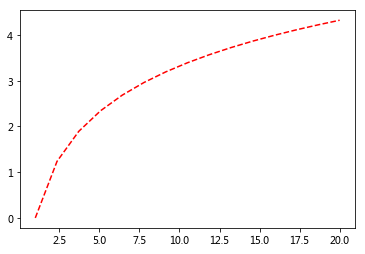

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

lineX = np.linspace(1,20, 15)
y=np.log2(lineX)

plt.figure(1, facecolor='white')
plt.plot(lineX, y, 'r--')
plt.show()

我们现在需要关心的是什么时候相等。如下图所示的凸函数:![images](images/09/01.png)

无论是凸函数还是凹函数，当且仅当自变量X是常数的时候，等式成立

##5.3 结论与推导
设置$\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}=C$，$\Rightarrow p(x^{(i)}, z^{(i)}; \theta)=Q_i(z^{(i)})C \Rightarrow \sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)=\sum_{z=1}^nQ_i(z^{(i)})C$

$\therefore \sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)=C*\sum_{z=1}^nQ_i(z^{(i)})$

$\because \sum_zQ_i(z^{(i)})=1$

$\therefore \sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)=C$

$\because \frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}=C$

$\therefore Q_i(z^{(i)})=\frac{p(x^{(i)}, z^{(i)}; \theta)}{C} \Rightarrow Q_i(z^{(i)})=\frac{p(x^{(i)}, z^{(i)}; \theta)}{\sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)}$

根据全概率公式，有：$\sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)=p(x^{(i)};\theta)$

$\therefore Q_i(z^{(i)})=\frac{p(x^{(i)}, z^{(i)}; \theta)}{p(x^{(i)};\theta)}$

又根据条件概率公式，有$ Q_i(z^{(i)})=p(z^{(i)}|x^{(i)};\theta)$

所以就有了EM算法的伪代码如下:
E步，不断循环i:$Q_i(z^{i}) := p(z^{(i)}|x^{(i)}; \theta)$

M步：$\theta := argmax_{\theta}\sum_i\sum_{z^(i)}Q_i(z^{(i)})log\frac{p(x^{(i)},z^{(i)}); \theta}{Q_i(z^{(i)})}$

M步具体的$p(x^{(i)})$，需要根据具体的模型来计算

高斯混合模型可以看作M个高斯密度函数的线性组合

#6 具体解法

高斯混合模型可以看作M个高斯密度函数的线性组合